In [ ]:
import os
import torch
from PIL import Image
import matplotlib.pyplot as plt
from datasets import load_dataset
from src.demo.core import SAETester
from tasks.utils import get_max_acts_and_images, get_sae_and_vit, get_classnames, load_datasets, get_all_classnames, DATASET_INFO

/home/icb/muhammed.dasdelen/.local/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
datasets = load_datasets()
# custom loader for bmc dataset. If you arrange BMC dataset in class-wise folders, 
# you can use the default loader.
# this is for a demonstration of custom loader.
for dataset_name in datasets:
    if dataset_name in ['custom_data']:
        def transform_function(example):
            # This function will be called on each example when it is accessed.
            try:
                example["image"] = [Image.open(img).convert("RGB") for img in example["image"]]
            except Exception as e:
                # Optionally handle errors, e.g., mark the example as invalid or return None.
                print(f"Error processing {example['image']}: {e}")
                example["image"] = [None]
            try:
                # print(example["label"])
                example["label"] = [int(label) for label in example["label"]]
            except Exception as e:
                print(f"Error processing {example['label']}: {e}")
                example["label"] = [None]
            return example 

        datasets[dataset_name].set_transform(transform_function)

In [ ]:
classnames = get_all_classnames(datasets, data_root='configs/classnames')

Class names loaded from /lustre/groups/labs/marr/qscd01/workspace/furkan.dasdelen/patchsae_camera_ready/configs/classnames/mll23_classnames.txt
Class names loaded from /lustre/groups/labs/marr/qscd01/workspace/furkan.dasdelen/patchsae_camera_ready/configs/classnames/acevedo_classnames.txt
Class names loaded from /lustre/groups/labs/marr/qscd01/workspace/furkan.dasdelen/patchsae_camera_ready/configs/classnames/matek_classnames.txt
Class names loaded from /lustre/groups/labs/marr/qscd01/workspace/furkan.dasdelen/patchsae_camera_ready/configs/classnames/bmc_classnames.txt


In [ ]:
root = 'out/feature_data'
sae_runname = 'sae_8jsxk3co'
vit_name = 'custom'

sae_path = "out/checkpoints/8jsxk3co/final_sparse_autoencoder_dinov2_vitb14_-2_resid_49152.pt"
sae, vit, cfg = get_sae_and_vit(sae_path=sae_path, vit_type='custom', device='cpu', backbone='dinov2_vitb14', model_path='./DinoBloom-B.pth', classnames=None)
max_act_imgs, mean_acts = get_max_acts_and_images(datasets, root, sae_runname, vit_name)


Using cache found in /home/icb/muhammed.dasdelen/.cache/torch/hub/facebookresearch_dinov2_main
/home/icb/muhammed.dasdelen/.cache/torch/hub/facebookresearch_dinov2_main/dinov2/layers/swiglu_ffn.py:51: UserWarning: xFormers is not available (SwiGLU)
  warnings.warn("xFormers is not available (SwiGLU)")
/home/icb/muhammed.dasdelen/.cache/torch/hub/facebookresearch_dinov2_main/dinov2/layers/attention.py:33: UserWarning: xFormers is not available (Attention)
  warnings.warn("xFormers is not available (Attention)")
/home/icb/muhammed.dasdelen/.cache/torch/hub/facebookresearch_dinov2_main/dinov2/layers/block.py:40: UserWarning: xFormers is not available (Block)
  warnings.warn("xFormers is not available (Block)")


In [ ]:
save_directory = os.path.join('out/demo',sae_runname,vit_name)
sae_clip = SAETester(vit, cfg, sae, mean_acts, max_act_imgs, datasets, classnames,save_dir=save_directory)


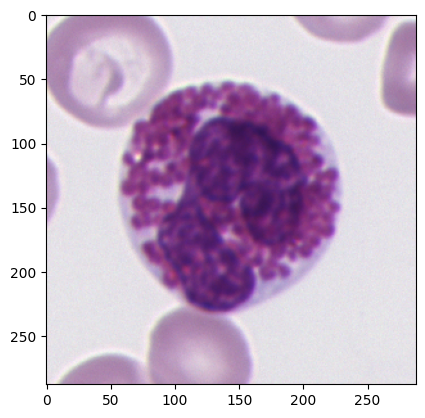

In [6]:
image_url = "images/19-6574.PAP.PB~E.1-1232.TIF"

sae_clip.register_image(image_url)

sae_clip.show_input_image(save=True)

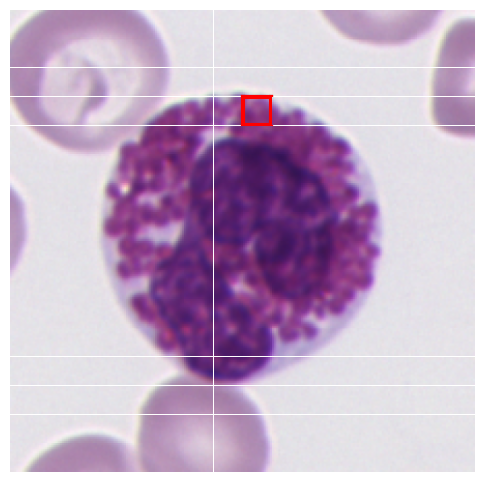

Union of top 2 neurons: [41690  6345]


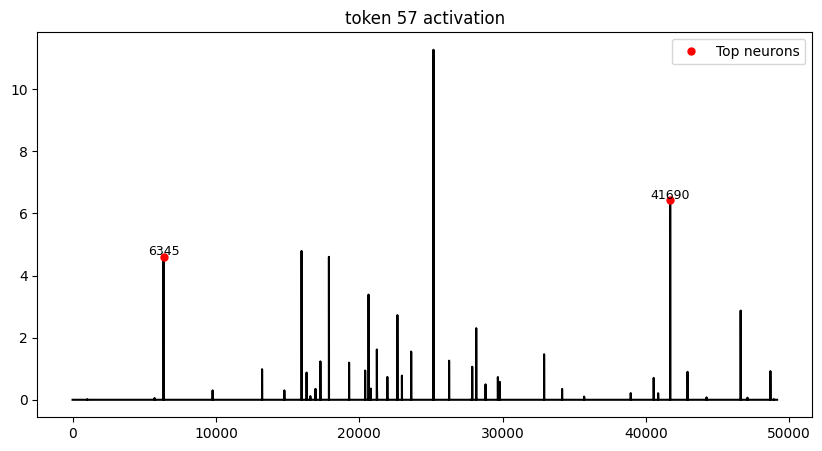

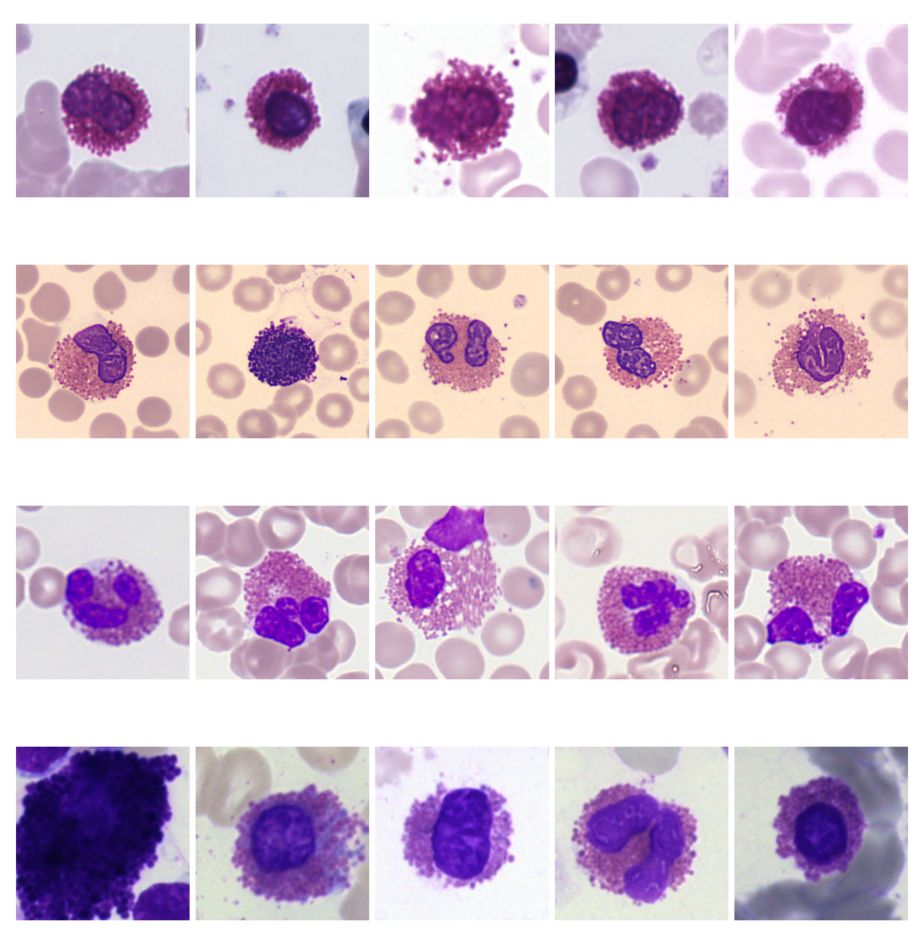

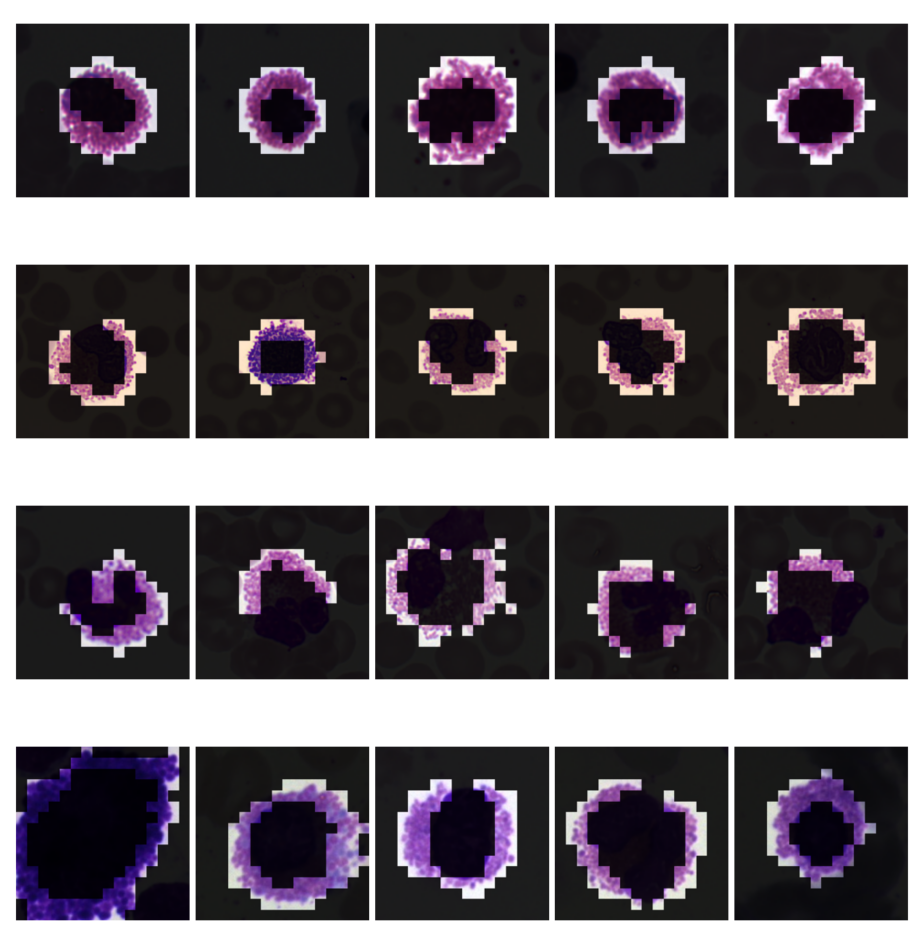

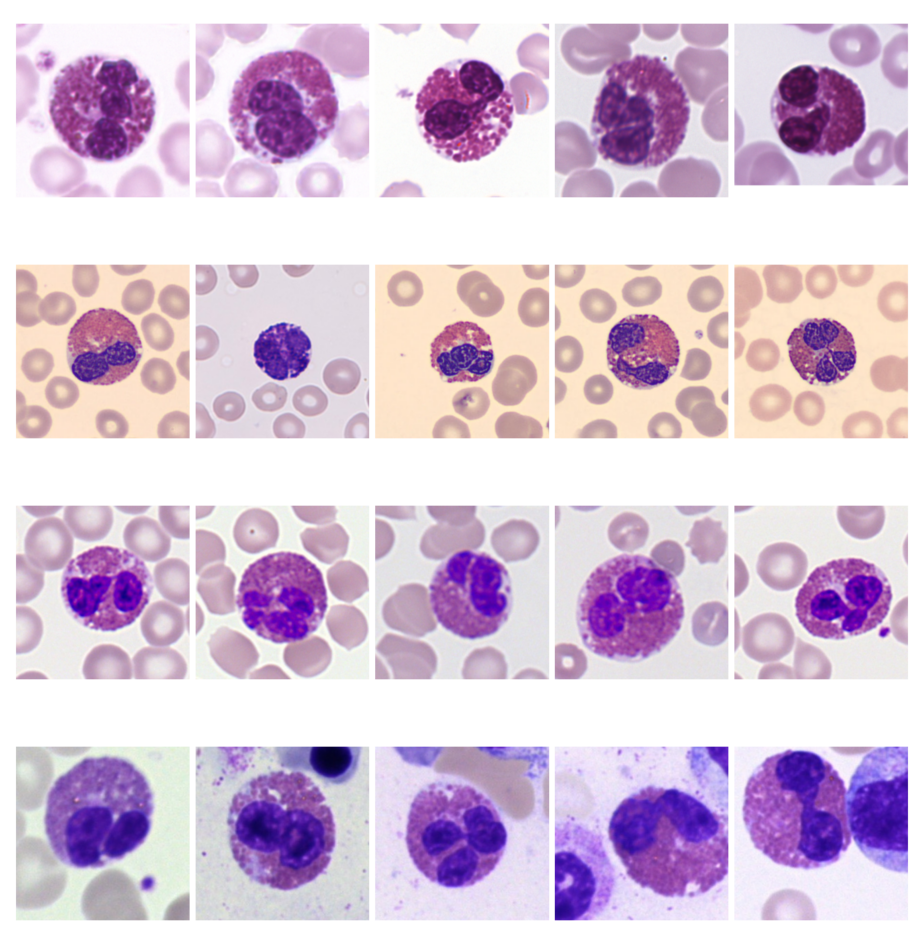

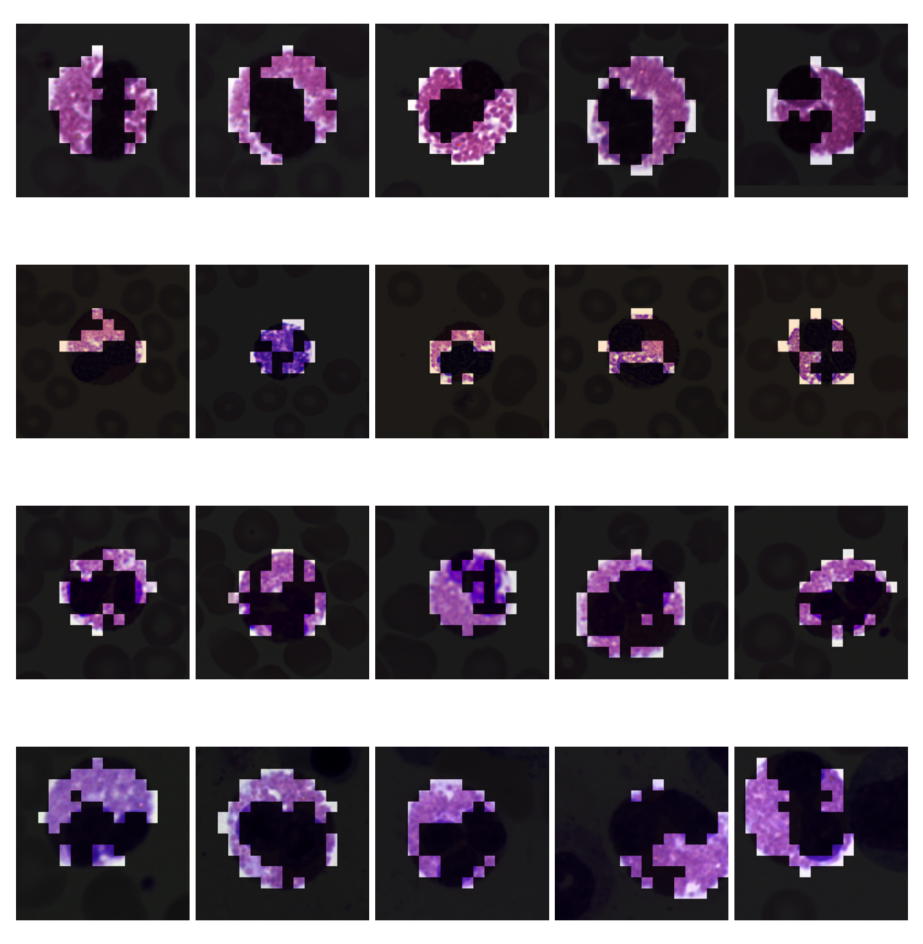

In [7]:
sae_clip.run(highlight_patch_idx=57, top_k=2, num_images=5, save=True)